<a href="https://colab.research.google.com/github/thecodeeagle/COVID-19-Real-Time-Face-Mask-Detector/blob/main/MaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

Since the dataset consisted of images of varying sizes, we resized all the images to a uniform size of 224 x 224. 

In [ ]:
import os
import numpy as np
directory = 'drive/My Drive/maskdetection/dataset/with_mask/'
count = 0
from PIL import Image
train_images = []
train_labels = []
for filename in os.listdir(directory):
 
    if filename.endswith(".jpg"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      print(img_arr.shape)
      train_images.append(img_arr)

      train_labels.append(0)
      count+=1

directory = 'drive/My Drive/maskdetection/dataset/without_mask/'

for filename in os.listdir(directory):
  
    if filename.endswith(".jpg"):
      img = Image.open(directory + filename)      
      newsize = (224, 224)
      img = img.resize(newsize)
      img_arr = np.array(img)
      print(img_arr.shape)        
      train_images.append(img_arr)
     
      train_labels.append(1)
      count+=1

In [ ]:
for image in train_images:
  print(image.shape)

Below given cell works on removing any corrupted images, if present in the dataset.

In [4]:
print(len(train_images)) #to check the lenght of the list with elements having different shape
count =0
for item in train_images:
  if item.shape!=(224,224,3):
    train_images.remove(item)
    train_labels.pop(count)
  count+=1

print(len(train_images)) #you'll know how many corrupt sized images you had

3702
3701


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


In [5]:
train_images = np.array(train_images)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.20)

In [7]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
np.savez("drive/My Drive/maskdetectionconverted-", train_images=train_images, test_images = test_images, train_labels = train_labels, test_labels = test_labels)

# Efficient Net : Integrated Feature Extractor

In [8]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights="imagenet", input_shape=(224,224,3),include_top=False,)

16711680/16705208 [==============================] - 0s 0us/step


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [10]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [11]:
x2 = Flatten()(model.output)
out = Dense(1, activation ='sigmoid')(x2)
from keras import Model
model = Model(inputs = model.input, outputs = out)

In [12]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=0.0001),metrics=["acc"])

In [13]:
history = model.fit(train_images, train_labels, epochs = 4, batch_size =64)

Epoch 1/4
47/47 [==============================] - 45s 559ms/step - loss: 0.2472 - acc: 0.8946
Epoch 2/4
47/47 [==============================] - 26s 553ms/step - loss: 0.0103 - acc: 0.9961
Epoch 3/4
47/47 [==============================] - 26s 561ms/step - loss: 8.6828e-04 - acc: 1.0000
Epoch 4/4
47/47 [==============================] - 27s 572ms/step - loss: 3.8839e-04 - acc: 1.0000


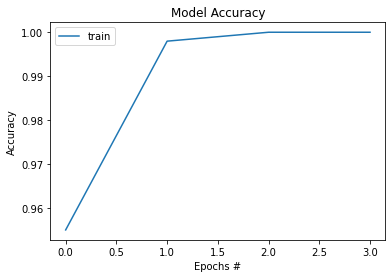

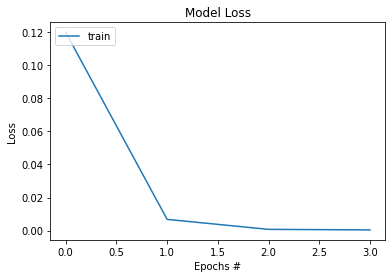

In [14]:
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs #')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs #')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
import time

timed_batch = test_images[0:320]

i=0
sum = 0.00
start_time = time.time()
results = model.predict(test_images)
time1 = time.time()
print("Inference Time =", (time1-start_time)/320)

Inference Time = 0.008542405068874359


In [16]:
model.evaluate(test_images, test_labels)

24/24 [==============================] - 2s 55ms/step - loss: 0.0111 - acc: 0.9946


[0.011085831560194492, 0.9946019053459167]